# Stop Words

What Are Stop Words?

Stop words are the most common words in a language that are usually filtered out during text processing because they carry little to no meaningful information for tasks like classification, search, or analysis.

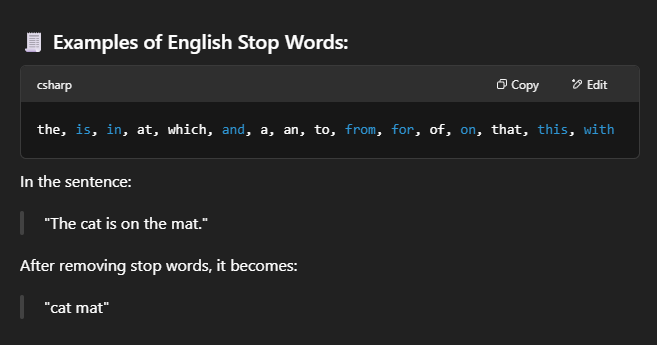

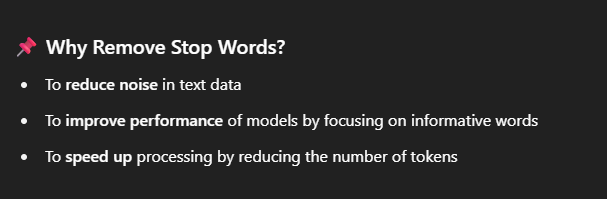

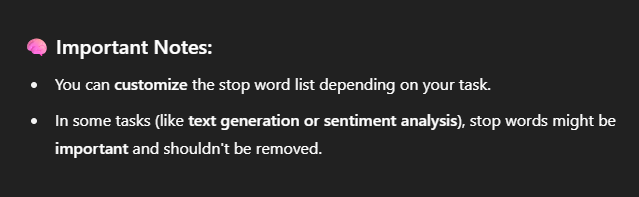

### Remove stop words using spacy

In [8]:

import spacy
from spacy.lang.en.stop_words import STOP_WORDS


# To view the stop words

print(STOP_WORDS)


# Find the stopwords in the doc

nlp = spacy.load("en_core_web_sm")
doc = nlp("We just opened our wings, the flying part is coming soon")

for token in doc:
    if token.is_stop:
        print("\nStop Words :", token)


# Create a def function

def preprocessing(text):

  doc = nlp(text)
  no_stop_words = [token.text for token in doc if not token.is_stop]
  return " ".join(no_stop_words)


Pre1 = preprocessing("Musk wants time to prepare for a trial over his")
print("\nPreprocessing 1 :",Pre1)

Pre2 = preprocessing("The other is not other but your divine brother")
print("\nPreprocessing 2 :",Pre2)



{'whereafter', 'just', 'whence', 'always', 'after', '‘re', 'besides', 'anyone', 'unless', 'done', 'almost', 'eight', 'ten', 'there', 'within', 'else', 'someone', 'alone', '‘m', 'by', 'anyway', 'that', 'as', 'ours', 'front', 'except', 'one', 'whole', 'what', 'using', 'ca', 'these', 'during', 'get', 'hers', 'beforehand', 'here', 'next', 'most', 'keep', '‘d', 'few', 'between', 'elsewhere', 'which', 'thence', 'hereby', '‘ve', 'below', 'into', 'put', 'top', '‘s', 'still', 'moreover', 'side', 'each', 'same', 'already', 'all', 'bottom', 'latterly', 'doing', 'move', 'former', 'down', 'others', 'nowhere', 'should', 'any', 'again', 'under', 'itself', 'serious', 'because', 'sometime', 'has', 'seems', 'show', 'whereupon', 'third', 'must', 'least', 'every', 'on', 'who', 'namely', 'go', 'well', 'our', 'her', 'being', 'back', 'at', 'will', '’ll', 'ever', '‘ll', 'so', "'ll", 'nor', 'twenty', 'your', 'toward', "'m", 'call', 'his', 'herself', 'neither', "n't", 'be', 'had', 'where', 'onto', 'say', "'s", 

### Remove stop words from pandas dataframe text column

Dataset is downloaded from: https://www.kaggle.com/datasets/jbencina/department-of-justice-20092018-press-releases It contains press releases of different court cases from depart of justice (DOJ). The releases contain information such as outcomes of criminal cases, notable actions taken against felons, or other updates about the current administration.

In [18]:
from re import A
import pandas as pd


# Define the Dataset

df = pd.read_json("doj_press.json",lines=True)
print(df.head())
print("\nShape :",df.shape)


# Filter out those rows that do not have any topics associated with the case.

df = df[df["topics"].str.len()!=0]
print("\nFilterd Shape :",df.shape)
print("\n",df.head())


# Take only 100 dataset for preprocessing

df = df.head(100)
print("\nPreprocessing Shape :",df.shape)


# Preprocess the content using the def function already created above.

df["contents_new"] = df["contents"].apply(preprocessing)
print("\n",df.head())


# To check the length before & after Preprocessing

Before = len(df.contents[4])
print("\nBefore Preprocessing :",Before)

After = len(df.contents_new[4])
print("\nAfter Preprocessing :",After)


        id                                              title  \
0     None       Convicted Bomb Plotter Sentenced to 30 Years   
1  12-919   $1 Million in Restitution Payments Announced t...   
2  11-1002  $1 Million Settlement Reached for Natural Reso...   
3   10-015  10 Las Vegas Men Indicted \r\nfor Falsifying V...   
4   18-898  $100 Million Settlement Will Speed Cleanup Wor...   

                                            contents  \
0  PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...   
1    WASHINGTON – North Carolina’s Waccamaw River...   
2        BOSTON– A $1-million settlement has been...   
3    WASHINGTON—A federal grand jury in Las Vegas...   
4  The U.S. Department of Justice, the U.S. Envir...   

                        date         topics  \
0  2014-10-01T00:00:00-04:00             []   
1  2012-07-25T00:00:00-04:00             []   
2  2011-08-03T00:00:00-04:00             []   
3  2010-01-08T00:00:00-05:00             []   
4  2018-07-09T00:00:00-04:00  [Enviro